In [1]:
pip install numpy pandas matplotlib scikit-learn tensorflow torch

Dữ liệu đọc được:
   x  y
0  0  4
1  1  0
2  1  0
3  2 -2
4  3 -3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


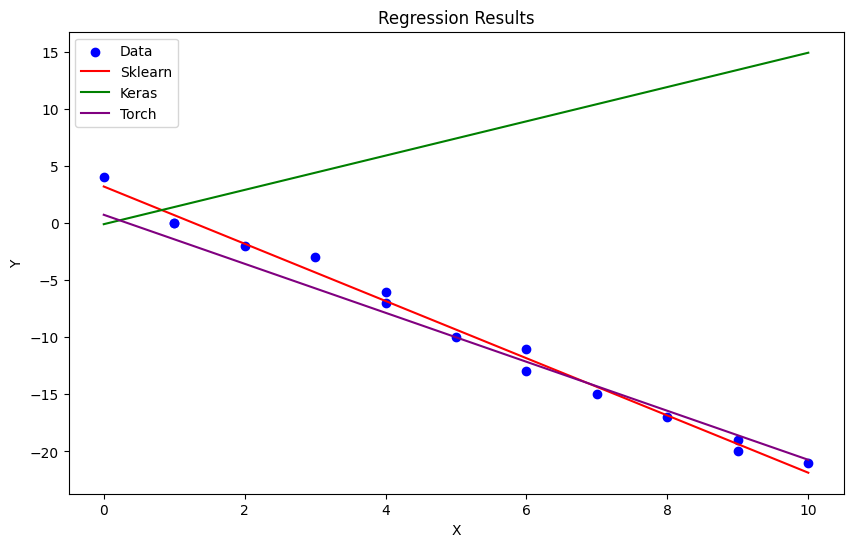

Thời gian chạy sklearn: 0.0178s
Thời gian chạy keras: 4.4662s
Thời gian chạy torch: 5.5995s


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import torch
import torch.nn as nn
import time


file_path = "baitap.csv"
df = pd.read_csv(file_path)


print(df.head())


X = np.array(df["x"]).reshape(-1, 1)
y = np.array(df["y"])

#sklearn
start_time = time.time()
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)
y_pred_sklearn = model_sklearn.predict(X)
time_sklearn = time.time() - start_time

#keras
start_time = time.time()
model_keras = Sequential([
    Dense(1, input_dim=1, activation='linear')
])
model_keras.compile(optimizer='adam', loss='mse')
model_keras.fit(X, y, epochs=100, verbose=0)
y_pred_keras = model_keras.predict(X)
time_keras = time.time() - start_time

#torch
start_time = time.time()
X_torch = torch.tensor(X, dtype=torch.float32)
y_torch = torch.tensor(y, dtype=torch.float32).view(-1, 1)

model_torch = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model_torch.parameters(), lr=0.01)

for epoch in range(100):
    optimizer.zero_grad()
    y_pred_torch = model_torch(X_torch)
    loss = criterion(y_pred_torch, y_torch)
    loss.backward()
    optimizer.step()
y_pred_torch = model_torch(X_torch).detach().numpy()
time_torch = time.time() - start_time

# Vẽ đồ thị
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Data", color="blue")
plt.plot(X, y_pred_sklearn, label="Sklearn", color="red")
plt.plot(X, y_pred_keras, label="Keras", color="green")
plt.plot(X, y_pred_torch, label="Torch", color="purple")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Regression Results")
plt.show()


print(f"Thời gian chạy sklearn: {time_sklearn:.4f}s")
print(f"Thời gian chạy keras: {time_keras:.4f}s")
print(f"Thời gian chạy torch: {time_torch:.4f}s")